In [2]:
"""
reshape
  - 1차원 -> 2차원
  - 2차원 -> 다른 모양 변경 
newaxis : 차원 추가 
T : 전치행렬(행렬 변경)
swapaxis : 축 변경 
transpose : 축 번호 순서에 의해서 구조 변경 
"""

import numpy as np
from matplotlib.image import imread # image read
import matplotlib.pyplot as plt # image show 

# 1. image shape 
file_name = "C:/Users/hyebin/Desktop/study/python_ML/images/test1.jpg"
image = imread(file_name)

In [3]:
print(type(image)) # numpy.ndarray
image.shape # (360, 540, 3) ->(세로,가로,rgb색상)

<class 'numpy.ndarray'>


(360, 540, 3)

array([[[ 93,  93,  85],
        [ 93,  93,  85],
        [ 94,  94,  86],
        ...,
        [112, 114, 101],
        [112, 114, 101],
        [112, 114, 101]],

       [[ 91,  91,  83],
        [ 92,  92,  84],
        [ 93,  93,  85],
        ...,
        [112, 114, 101],
        [112, 114, 101],
        [112, 114, 101]],

       [[ 90,  90,  82],
        [ 90,  90,  82],
        [ 91,  91,  83],
        ...,
        [112, 114, 101],
        [112, 114, 101],
        [112, 114, 101]],

       ...,

       [[ 30,  28,  33],
        [ 30,  28,  33],
        [ 30,  28,  33],
        ...,
        [137, 126, 106],
        [136, 125, 105],
        [135, 124, 104]],

       [[ 32,  30,  35],
        [ 32,  30,  35],
        [ 32,  30,  35],
        ...,
        [131, 118,  99],
        [130, 117,  98],
        [129, 116,  97]],

       [[ 34,  32,  37],
        [ 34,  32,  37],
        [ 34,  32,  37],
        ...,
        [128, 113,  94],
        [127, 112,  93],
        [126, 111,  92]]

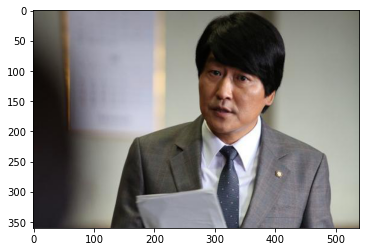

In [4]:
plt.imshow(image) # 이미지 출력 
image # 픽셀 정보 출력(0~255) 

In [5]:
# rgb 색상 분류 
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

print(r)
print(g)
print(b)

[[ 93  93  94 ... 112 112 112]
 [ 91  92  93 ... 112 112 112]
 [ 90  90  91 ... 112 112 112]
 ...
 [ 30  30  30 ... 137 136 135]
 [ 32  32  32 ... 131 130 129]
 [ 34  34  34 ... 128 127 126]]
[[ 93  93  94 ... 114 114 114]
 [ 91  92  93 ... 114 114 114]
 [ 90  90  91 ... 114 114 114]
 ...
 [ 28  28  28 ... 126 125 124]
 [ 30  30  30 ... 118 117 116]
 [ 32  32  32 ... 113 112 111]]
[[ 85  85  86 ... 101 101 101]
 [ 83  84  85 ... 101 101 101]
 [ 82  82  83 ... 101 101 101]
 ...
 [ 33  33  33 ... 106 105 104]
 [ 35  35  35 ...  99  98  97]
 [ 37  37  37 ...  94  93  92]]


In [6]:
# 2. image data reshpae
from sklearn import datasets # dataset load 역할 

digits = datasets.load_digits()
digits.DESCR # 데이터셋 설명문 

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [7]:
X = digits.data # x변수(input) 
y = digits.target # y변수(output) 
print(X.shape) # (1797, 64) : 2차원 : 1,797장 이미지(8x8 픽셀)
print(y.shape) # (1797,) : 1차원 : 1,797장 정답(10진수)

(1797, 64)
(1797,)


In [8]:
print(type(X)) # numpy.ndarray
print(type(y)) # numpy.ndarray

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
print(X[:5, :10]) # image 픽셀 
y[:5] # image 정답(10진수) # [0, 1, 2, 3, 4]


[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8.]
 [ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.]]


array([0, 1, 2, 3, 4])

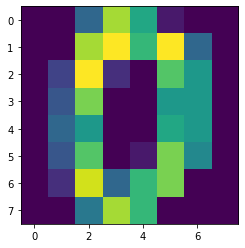

In [10]:
# image 출력 
img0 = X[0].reshape(8, 8)
img0.shape # (8, 8) <- 64
plt.imshow(img0) # 0모양 


(8, 8)


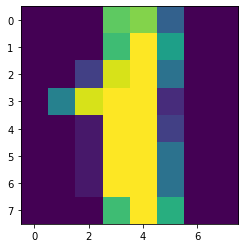

In [12]:
img1 = X[1].reshape(8, 8)
print(img1.shape) # (8, 8) <- 64
plt.imshow(img1) # 1모양 

In [13]:
# 전체 image 대상 reshape
X_3d = X.reshape(-1, 8, 8) # 2d -> 3d
X_3d.shape # (1797, 8, 8)  -> (image의 수, 세로 픽셀, 가로 픽셀) 컬러가 생략되면 흑백

(1797, 8, 8)

In [14]:
# channel dim(color) 추가 : (image 수, 세로, 가로, color)
X_4d = X_3d[:,:,:,np.newaxis] # 4번 축에 추가 
X_4d.shape # (1797, 8, 8, 1)
#X_3d[:,np.newaxis,:,:,].shape # 2번 축에 추가 (1797, 1, 8, 8)

(1797, 8, 8, 1)

In [15]:
# 3. reshape
lst = range(1, 13) # 1~12
# 1d -> 2d
arr2d = np.array(lst).reshape(3, 4)
arr2d.shape # (3, 4)

(3, 4)

In [16]:
# 2d(3,4) -> 2d(4,3) : 수 일치 
arr2d_2 = arr2d.reshape(4, 3)
arr2d_2

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [17]:
# arr2d.reshape(4, 4) : 수 일치 안된 경우 

# 4. 전치행렬 
print(arr2d)
print(arr2d.T)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


In [18]:
# 5. swapaxes : 2차원(전치행렬 동일)
print(arr2d.swapaxes(0, 1))

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


In [19]:
# 6. transpose
'''
1차원 : 효과 없음 
2차원 : 전치행렬 동일 
n차원 : 축 순서에 의해서 구조 변경 
''' 

arr3d = np.arange(1, 25).reshape(4, 2, 3) # 4면2행3열 
print(arr3d.shape) # (4, 2, 3)
arr3d

(4, 2, 3)


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24]]])

In [20]:
# transpose default : (0,1,2) -> (2,1,0)
arr3d_def = arr3d.transpose()
arr3d_def.shape # (3, 2, 4)

(3, 2, 4)

In [21]:
# (0,1,2) -> (2,0,1)
arr3d_user = arr3d.transpose(2,0,1) # -> (2,1,0) 이렇게 순서가 바귐
print(arr3d_user.shape) # (3, 4, 2)
arr3d_user

(3, 4, 2)


array([[[ 1,  4],
        [ 7, 10],
        [13, 16],
        [19, 22]],

       [[ 2,  5],
        [ 8, 11],
        [14, 17],
        [20, 23]],

       [[ 3,  6],
        [ 9, 12],
        [15, 18],
        [21, 24]]])